In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# numpy random으로 100개의 가짜 데이터 2개 만들기
a_data = np.float32(np.random.rand(2, 100))
# learning lable은 아래 식으로 산출(W = [0.1, 0.2], b = 0.3)
b_data = np.dot([0.100, 0.200], a_data) + 0.300

In [3]:
a_data

array([[4.25633878e-01, 3.93451184e-01, 3.89370888e-01, 9.08334553e-01,
        5.77052593e-01, 7.30520904e-01, 8.28472912e-01, 6.40991449e-01,
        9.26548719e-01, 5.32043636e-01, 1.78798601e-01, 1.84080124e-01,
        1.30565584e-01, 2.60074258e-01, 5.46118498e-01, 3.27923745e-01,
        4.25657928e-02, 4.37930763e-01, 5.69466412e-01, 2.76342690e-01,
        9.08012033e-01, 3.43658268e-01, 9.15565908e-01, 3.82577091e-01,
        3.61596882e-01, 3.74865919e-01, 1.73698246e-01, 7.65763581e-01,
        9.83396351e-01, 4.62160051e-01, 9.69595253e-01, 8.69315684e-01,
        8.06572020e-01, 5.52041233e-01, 3.32482271e-02, 2.33461298e-02,
        3.22388589e-01, 2.42901787e-01, 6.25089109e-01, 3.69444847e-01,
        3.92897367e-01, 4.60178375e-01, 9.83726799e-01, 8.07295918e-01,
        3.29646528e-01, 1.86748624e-01, 6.69866204e-01, 8.16332817e-01,
        5.20215690e-01, 7.93135524e-01, 6.04937792e-01, 7.77803302e-01,
        1.55754775e-01, 4.67603177e-01, 5.02132773e-01, 4.692460

In [5]:
b_data

array([0.41805685, 0.44131611, 0.44253021, 0.57963647, 0.3927781 ,
       0.50770895, 0.47347558, 0.3732219 , 0.41588043, 0.37240352,
       0.40479209, 0.44598794, 0.49917436, 0.40457197, 0.49878615,
       0.42220016, 0.49956858, 0.45369502, 0.51046475, 0.42948628,
       0.52862173, 0.33580178, 0.48497409, 0.5176268 , 0.46833015,
       0.36803699, 0.36486255, 0.49382011, 0.40613897, 0.38646419,
       0.44311036, 0.47530252, 0.51748243, 0.48278907, 0.33665612,
       0.3869687 , 0.51629115, 0.3607221 , 0.43988782, 0.38185962,
       0.48116786, 0.34650829, 0.53483322, 0.43207309, 0.36581582,
       0.47587242, 0.50842483, 0.56405945, 0.43271717, 0.55037367,
       0.51511042, 0.55078446, 0.43726355, 0.38431139, 0.40112866,
       0.42863665, 0.43813405, 0.48600459, 0.4740705 , 0.44980511,
       0.48613764, 0.46922976, 0.40663526, 0.36383879, 0.35442503,
       0.42144516, 0.43698217, 0.45869554, 0.4707364 , 0.43013425,
       0.37911189, 0.49046067, 0.44857079, 0.42108774, 0.53940

### TensorFlow Operations
- Basic operations
- Tensor types
- Project speed dating
- Placeholders and feeding inputs
- Lazy loading

In [6]:
# TensorFlow basic operation
a = tf.constant(2)
b = tf.constant(3)
x = tf.add(a, b)

In [7]:
with tf.Session() as sess:
    print(sess.run(x))

5


In [14]:
# TensorBoard 맛보기
with tf.Session() as sess:
    sess.run(x)
    writer = tf.summary.FileWriter('/tmp/tb', sess.graph)

In [15]:
writer.close()

In [ ]:
# Constants
tf.constant(value, dtype=None, shape=None, name='Const', verify_shape=False)

In [17]:
a = tf.constant([2, 2], name='a')
b = tf.constant([[0, 1], [2, 3]], name='b')

x = tf.add(a, b, name='add')
y = tf.multiply(a, b, name='mul')

In [18]:
with tf.Session() as sess:
    x, y = sess.run([x, y])
    print(x, y)

[[2 3]
 [4 5]] [[0 2]
 [4 6]]


In [ ]:
# Tensors filled with a specific value
# tf.zeros(shape, dtype=tf.float32, name=None)

In [19]:
tf.zeros([2, 3], tf.int32)

<tf.Tensor 'zeros:0' shape=(2, 3) dtype=int32>

In [ ]:
# tf.zeros_like(input_tensor, dtype=None, name=None, optimize=True)
# input_tensor로 형태의 텐서와 타입(타입이 지정되지 않은 경우)을 생성하지만, 모든 원소는 0이다.

In [20]:
input_tensor = ([[0, 1], [2, 3], [4, 5]])
tf.zeros_like(input_tensor)

<tf.Tensor 'zeros_like:0' shape=(3, 2) dtype=int32>

In [21]:
# tf.ones(shape, dtype=tf.float32, name=None)
# Similar to numpy.ones, numpy.ones_like
tf.ones_like(input_tensor, dtype=None, name=None, optimize=True)

<tf.Tensor 'ones_like:0' shape=(3, 2) dtype=int32>

## Regression

- 1000개의 데이터 포인트를 만듭니다. 
- x1은 평균값을 0으로 갖고 표준편차가 0.55인 정규분포를 생성합니다. 
- y1은 x1의 데이터를 이용해 기울기는 0.1, y 절편은 0.3인 방정식을 이용해 만듭니다. 
- 이때 y 절편에 평균값 0, 표준편차 0.03인 정규분포를 더하여 포인트를 방정식이 만드는 직선의 y축 방향으로 흩어지게 만듭니다.

In [23]:
num_points = 1000
vectors_set = []
for i in range(num_points):
         x1 = np.random.normal(0.0, 0.55)
         y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
         vectors_set.append([x1, y1])

- vectors_set는 list of list, 즉 2차원 배열로 이루어져 있습니다. 2차원의 첫번째 요소를 x_data에 두번째 요소를 y_data로 저장합니다.

In [24]:
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

- matplotlib.pyplot을 임포트하고 노트북 페이지에 그래프가 나타나도록 쥬피터 노트북의 matplotlib 매직 커맨드를 사용합니다.

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

- x, y 좌표에 x_data, y_data 를 사용하여 붉은색 원으로 산포도를 그립니다.

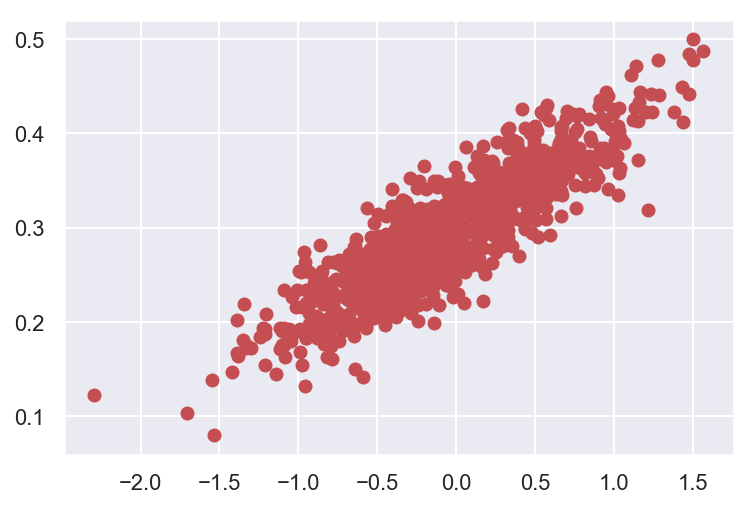

In [28]:
plt.plot(x_data, y_data, 'ro')
plt.show()

- -1~1 사이의 랜덤한 균등분포 값으로 1차원 엘리먼트가 한개인 가중치 텐서를 만듭니다. 
- 바이어스 텐서는 0으로 초기화된 엘리먼트를 갖는 1차원 텐서입니다.

In [29]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

- loss 함수를 정의하고 최적화 방법은 학습속도 0.5인 그래디언트 디센트를 사용합니다.

In [30]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

- 모든 변수를 초기화하고 세션을 시작합니다.

In [32]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

- 8번 반복하면서 train을 실행시킵니다. 반복마다 W, b 값의 변화를 프린트하고 그래프로 직선의 기울기의 변화를 살펴봅니다.

0 [-0.3178151] [0.2775642] 0.055010416


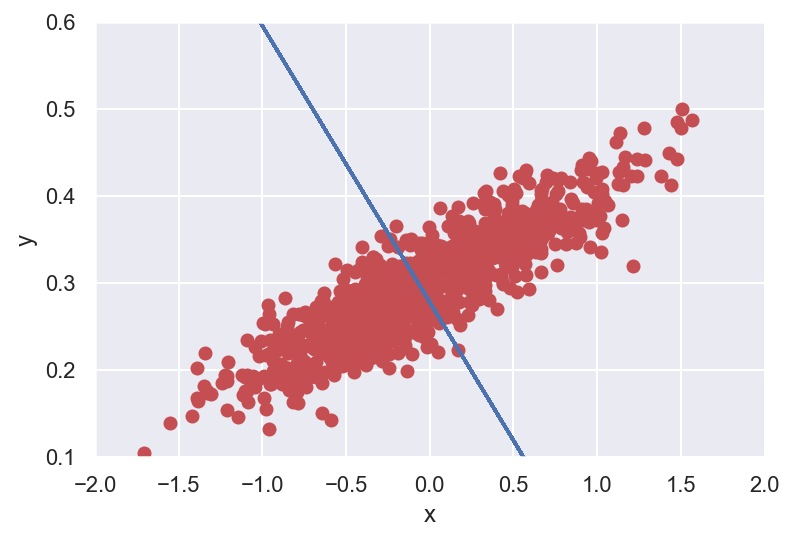

1 [-0.18922633] [0.28431472] 0.026932709


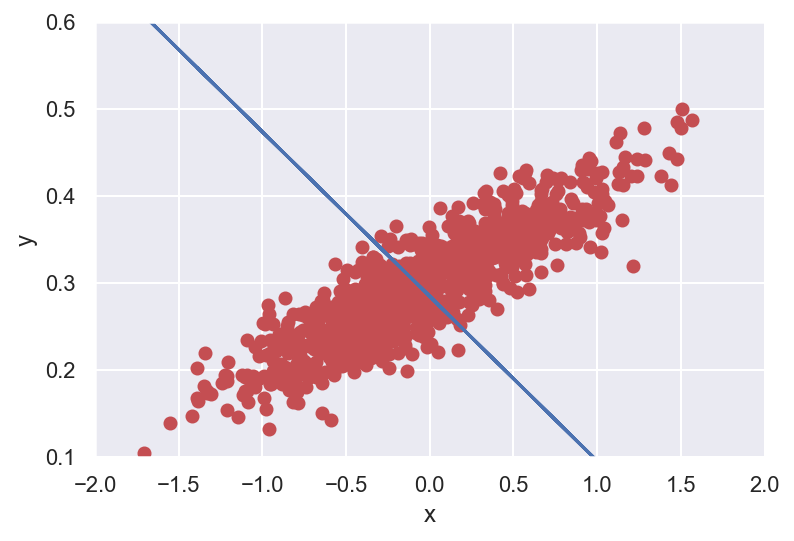

2 [-0.1000846] [0.28941742] 0.013432295


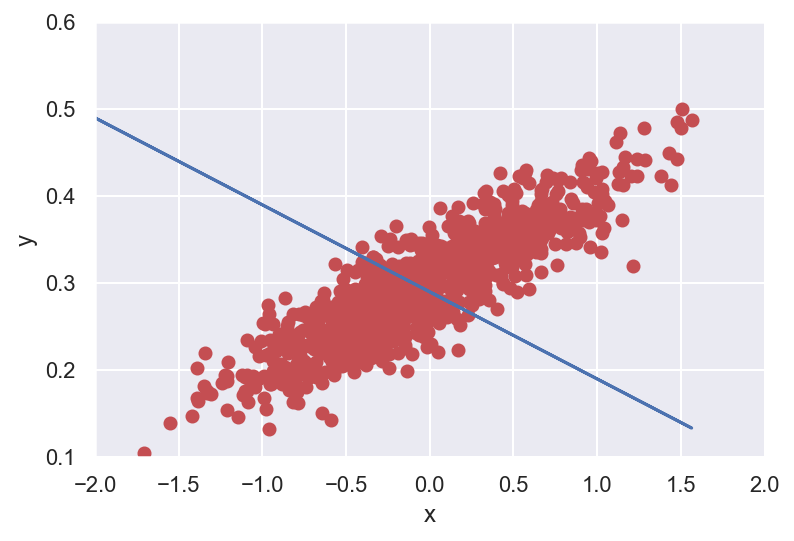

3 [-0.03827201] [0.29295474] 0.006940899


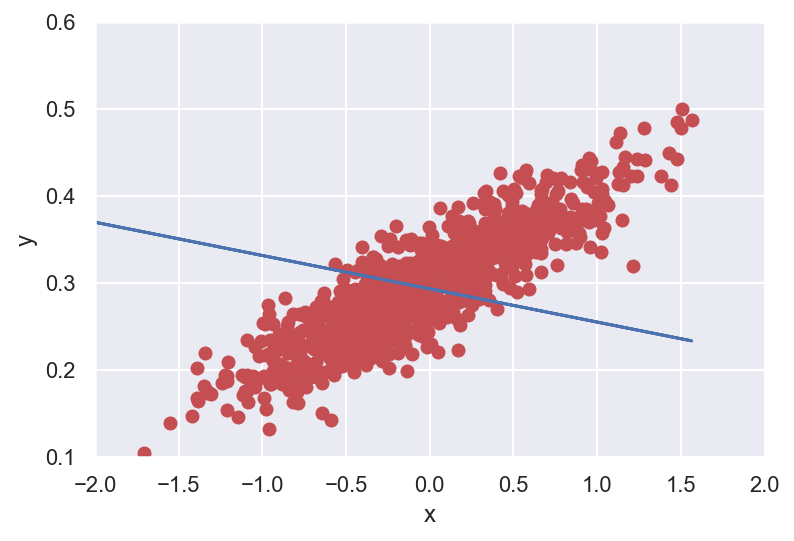

4 [0.00458999] [0.2954076] 0.0038196447


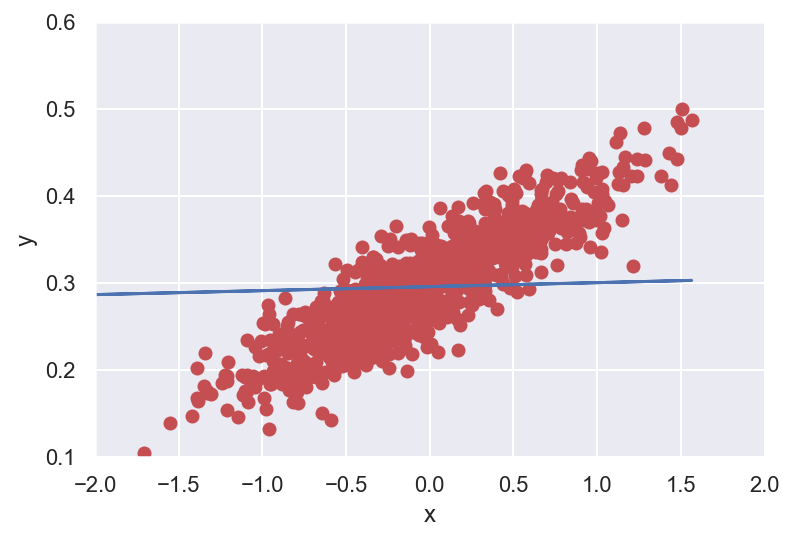

5 [0.03431129] [0.29710844] 0.0023188544


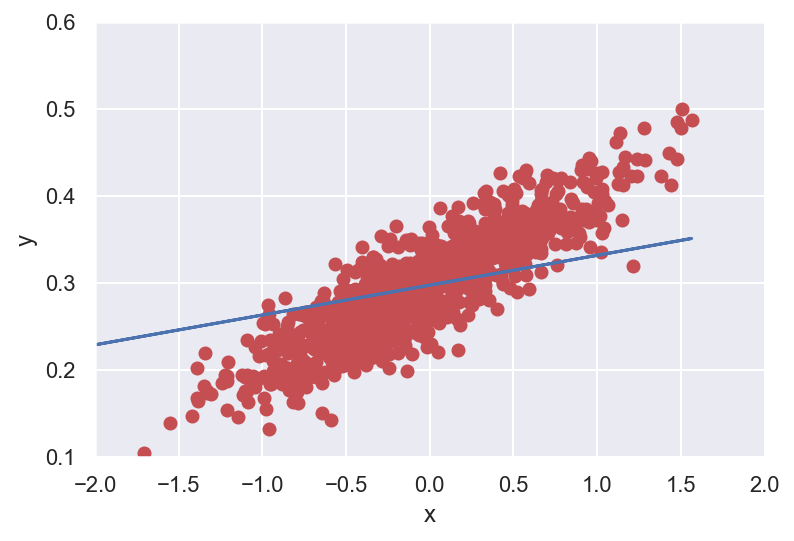

6 [0.0549206] [0.29828787] 0.0015972304


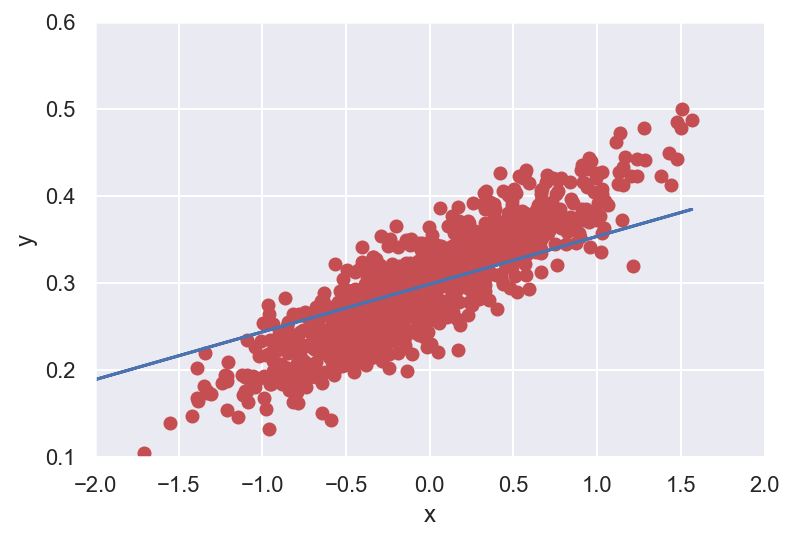

7 [0.06921148] [0.29910567] 0.0012502521


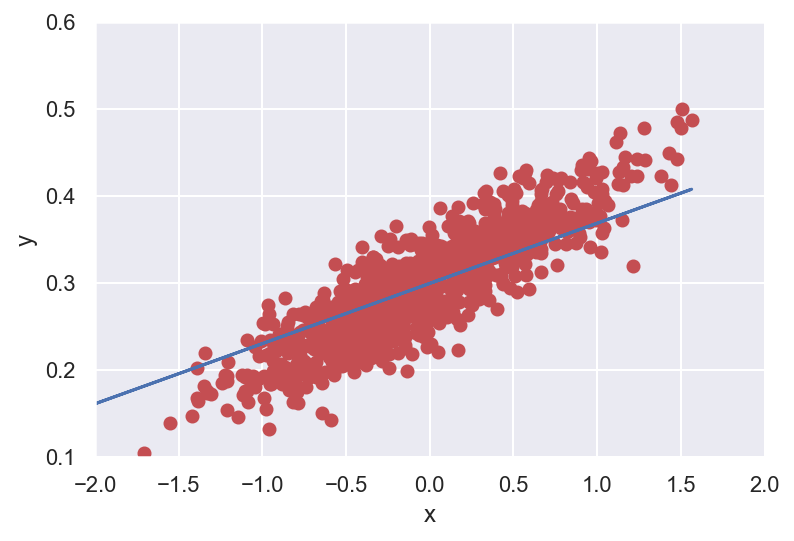

In [33]:
for step in range(8):
    sess.run(train)
    print(step, sess.run(W), sess.run(b), sess.run(loss))
    # 산포도 그리기
    plt.plot(x_data, y_data, 'ro')
    # 직선 그리기
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    # x, y 축 레이블링을 하고 각 축의 최대, 최소값 범위를 지정합니다.
    plt.xlabel('x')
    plt.xlim(-2,2)
    plt.ylim(0.1,0.6)
    plt.ylabel('y')
    plt.show()